### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure.  


In [2]:
# write your answer here
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
tangier_id = "https://weather.com/weather/tenday/l/701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c"
url = "https://weather.com/"
page = requests.get(url)

In [4]:
page = requests.get(tangier_id)

<!DOCTYPE html>
<html dir="ltr" lang="en-US">
 <head>
  <meta charset="utf-8" data-react-helmet="true"/>
  <meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-react-helmet="true" name="viewport"/>
  <meta content="max-image-preview:large" data-react-helmet="true" name="robots"/>
  <meta content="index, follow" data-react-helmet="true" name="robots"/>
  <meta content="origin" data-react-helmet="true" name="referrer"/>
  <meta content="Be prepared with the most accurate 10-day forecast for Tangier, Tanger-Tétouan-Al Hoceïma, Morocco with highs, lows, chance of precipitation from The Weather Channel and Weather.com" data-react-helmet="true" name="description"/>
  <meta content="#ffffff" data-react-helmet="true" name="msapplication-TileColor"/>
  <meta content="/daily/assets/ms-icon-144x144.d353af.png" data-react-helmet="true" name="msapplication-TileImage"/>
  <meta content="#ffffff" data-react-helmet="true" name="theme-color"/>
  <meta content="app-id=295646461" 
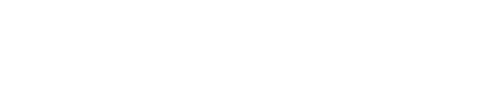
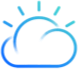

In [5]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

In [6]:
# Scrap weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import warnings
import csv
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
def get_weather_forecast(url,city):
    source = requests.get(url).text
    soup = BeautifulSoup(source, 'lxml')
    filename = city + '_weather_forecast.csv'
    csv_file = open(filename, 'w')
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['day','min', 'max'])
    for article in soup.find_all("div", class_="DetailsSummary--DetailsSummary--1DqhO DetailsSummary--fadeOnOpen--KnNyF"):
        dayt = article.find('h3').text
        mint = article.find('span',class_='DetailsSummary--highTempValue--3PjlX').text
        maxt = article.find('span',class_='DetailsSummary--lowTempValue--2tesQ').text
        csv_writer.writerow([dayt,mint, maxt])
    csv_file.close()

In [8]:
source = 'https://weather.com/weather/tenday/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111'
city="benguerir"
get_weather_forecast(source,city)

In [9]:
source = 'https://weather.com/weather/tenday/l/d85f06e72cf2831588a6321bed1d67ed17af1d3d7fe060cc7f2c5ccbfa35e911'
city="tanger"
get_weather_forecast(source,city)

In [10]:
import pandas as pd
databenguerir = pd.read_csv('benguerir_weather_forecast.csv',encoding= 'unicode_escape')
datatanger = pd.read_csv('tanger_weather_forecast.csv', encoding= 'unicode_escape')
databenguerir=databenguerir.iloc[1:11]
datatanger=datatanger.iloc[1:11]

In [11]:
# remove the `°` character from the `min` and `max` columns
databenguerir['min'] = databenguerir['min'].str.replace('°', '')
databenguerir['max'] = databenguerir['max'].str.replace('°', '')
datatanger['min'] = datatanger['min'].str.replace('°', '')
datatanger['max'] = datatanger['max'].str.replace('°', '')

In [12]:
#type of data columns
print(databenguerir.dtypes)
print(datatanger.dtypes)

day    object
min    object
max    object
dtype: object
day    object
min    object
max    object
dtype: object


In [13]:
#convert the data type of the columns to int
databenguerir['min'] = databenguerir['min'].astype(float)
databenguerir['max'] = databenguerir['max'].astype(float)
datatanger['min'] = datatanger['min'].astype(float)
datatanger['max'] = datatanger['max'].astype(float)

In [14]:
#add column average temperature to the dataframe
databenguerir['average'] = (databenguerir['min'] + databenguerir['max'])/2
datatanger['average'] = (datatanger['min'] + datatanger['max'])/2

In [15]:
databenguerir.head()

,day,min,max,average
1,Tue 27,73.0,42.0,57.5
2,Wed 28,72.0,42.0,57.0
3,Thu 29,73.0,43.0,58.0
4,Fri 30,74.0,47.0,60.5
5,Sat 31,76.0,47.0,61.5


In [16]:
datatanger.head()

,day,min,max,average
1,Tue 27,69.0,55.0,62.0
2,Wed 28,68.0,51.0,59.5
3,Thu 29,67.0,51.0,59.0
4,Fri 30,67.0,50.0,58.5
5,Sat 31,70.0,53.0,61.5


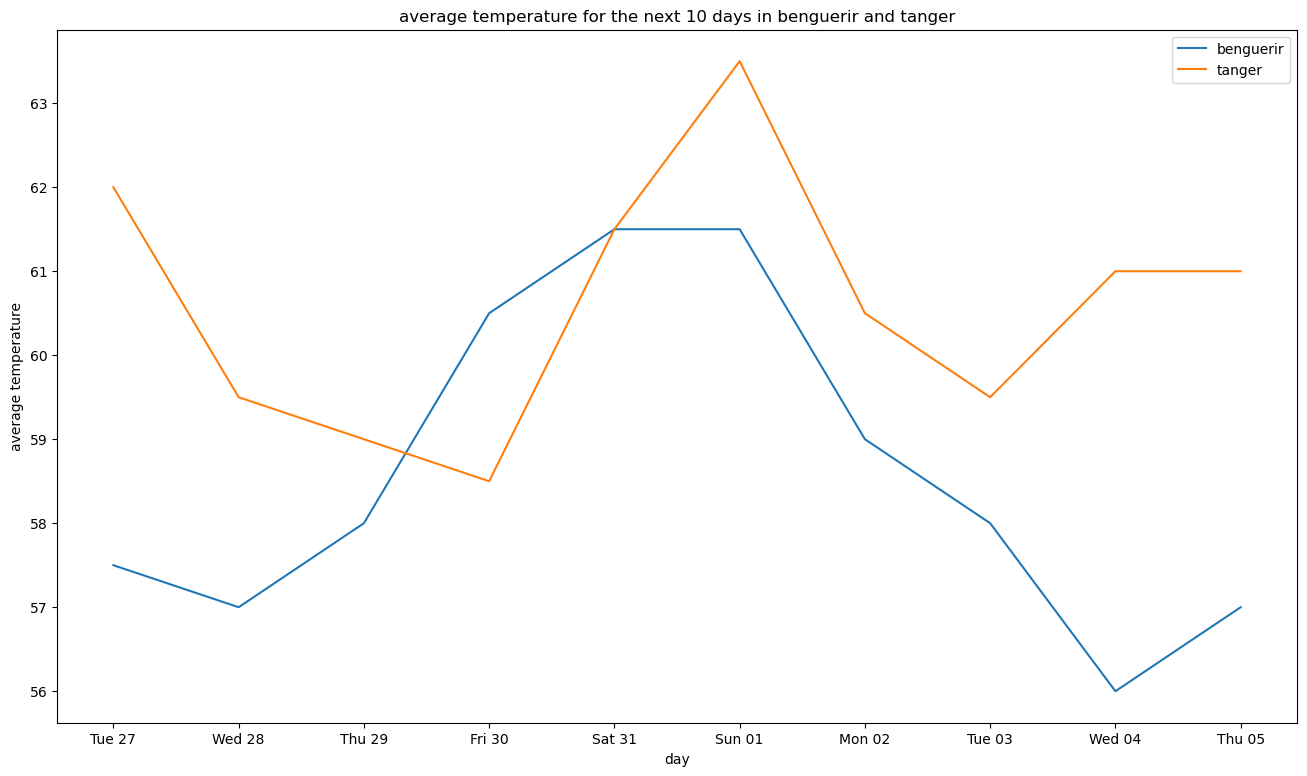

In [17]:
#plot the average temperature for the next 10 days in benguerir and tanger
plt.figure(figsize=(16,9))
plt.plot(databenguerir['day'],databenguerir['average'],label='benguerir')
plt.plot(datatanger['day'],datatanger['average'],label='tanger')
plt.xlabel('day')
plt.ylabel('average temperature')
plt.title('average temperature for the next 10 days in benguerir and tanger')
plt.legend()
plt.show()

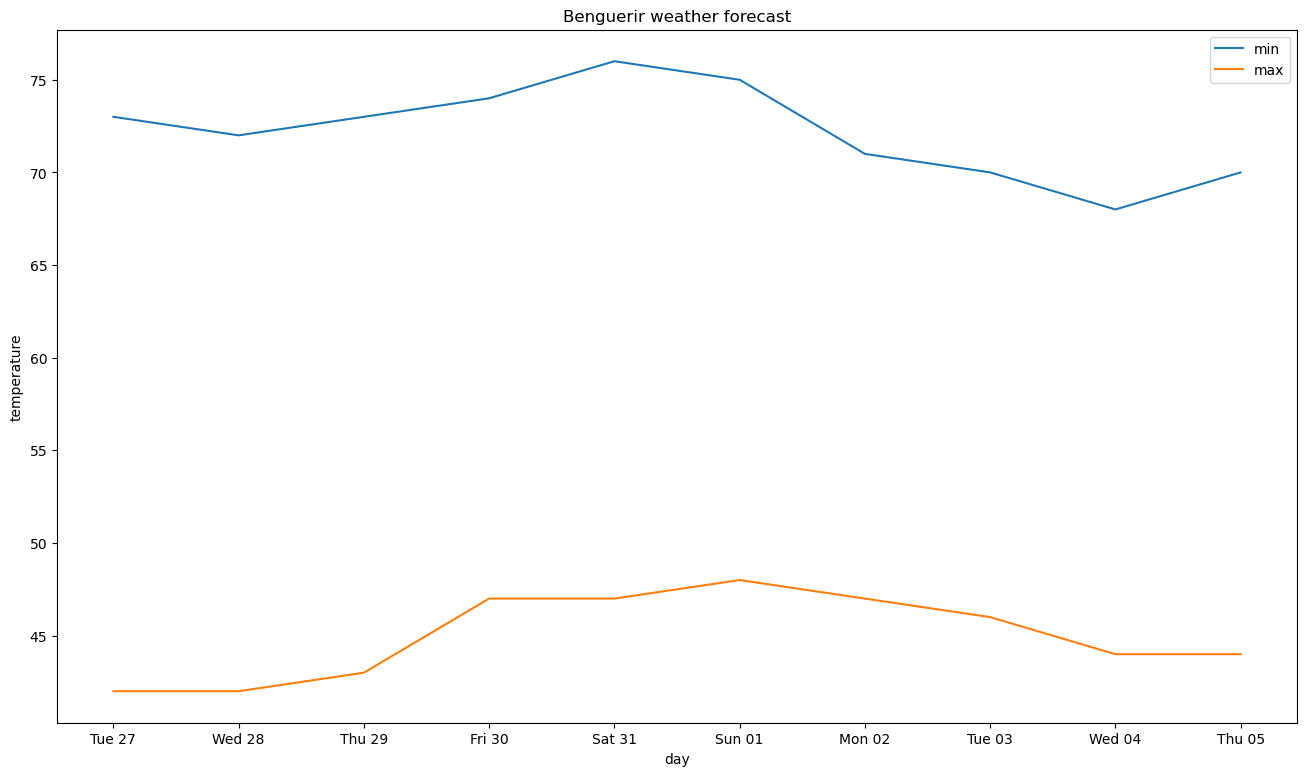

In [18]:
#plot the min and max temperature for the next 10 days in benguerir
plt.figure(figsize=(16,9))
plt.plot(databenguerir['day'],databenguerir['min'],label='min')
plt.plot(databenguerir['day'],databenguerir['max'],label='max')
plt.legend()
plt.title('Benguerir weather forecast')
plt.xlabel('day')
plt.ylabel('temperature')
plt.show()

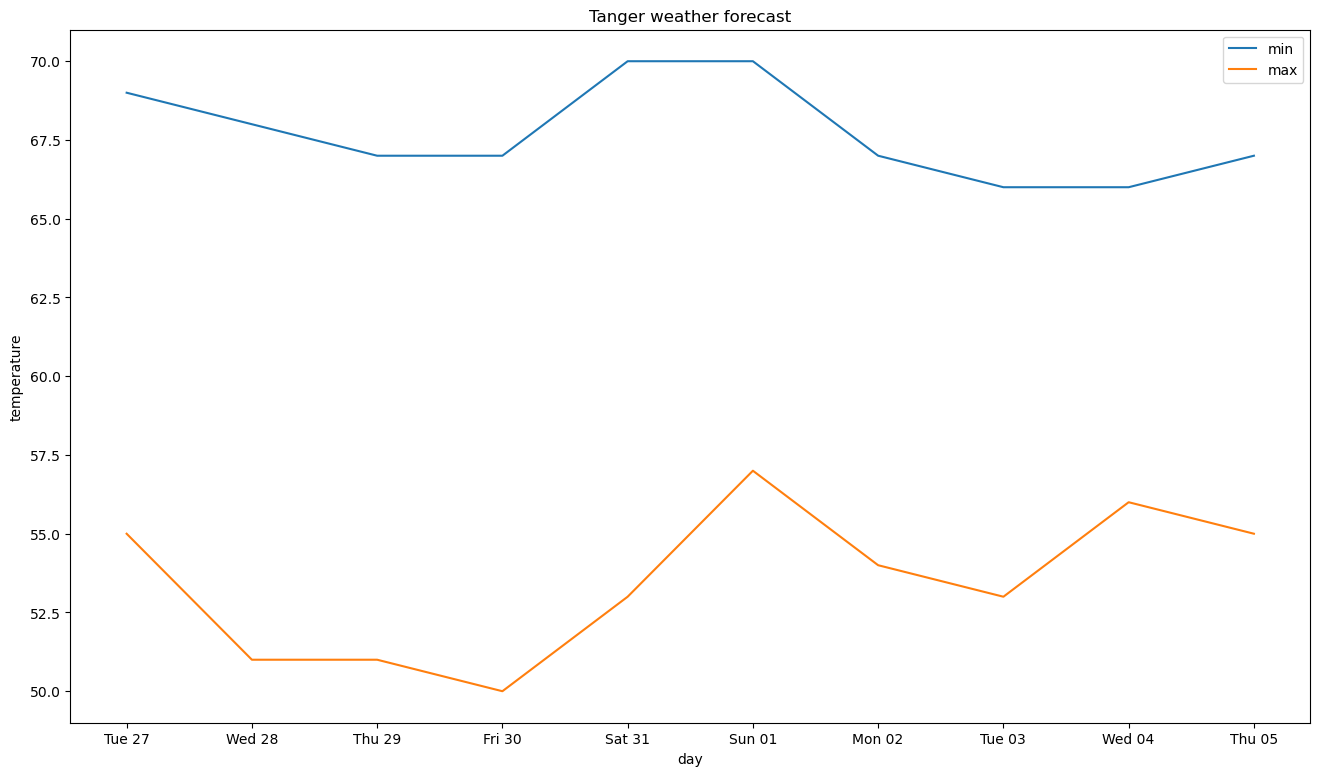

In [19]:
#plot the min and max temperature for the next 10 days in tanger
plt.figure(figsize=(16,9))
plt.plot(datatanger['day'],datatanger['min'],label='min')
plt.plot(datatanger['day'],datatanger['max'],label='max')
plt.legend()
plt.title('Tanger weather forecast')
plt.xlabel('day')
plt.ylabel('temperature')
plt.show()